In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
data = pd.read_csv("wine.data.txt", sep = ',', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
X = data.iloc[:,1:14]
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
y = data.iloc[:,0]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [10]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
y_pred = clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
print("Accuracy is: ", accuracy_score(y_pred, y_test))

Accuracy is:  1.0


In [13]:
#R^2 Score
print("The train score: ", clf.score(X_train, y_train))
print("The test score: ", clf.score(X_test, y_test))

The train score:  1.0
The test score:  1.0


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [15]:
#high accuracy: 1
#High precision: 1
#High train and test R^2 score, giong nhau = 1
#model tot

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [17]:
#tinh do chinh xac cua: logistic, RandomForest, Naive bayes, SVM, KNN
models = [RandomForestClassifier(n_estimators= 200),
         LogisticRegression(solver='liblinear'),
         GaussianNB(),
         SVC(kernel='linear')]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
i = 0
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    print(accuracies)
    entries.append([model_name, accuracies.mean()])
    i +=1
cv_df = pd.DataFrame(entries, columns=['model_name', 'Accuracy'])

[0.97222222 0.94444444 0.97222222 0.97142857 1.        ]
[0.91666667 0.94444444 0.94444444 1.         1.        ]
[0.94444444 0.97222222 0.97222222 0.94285714 1.        ]
[0.88888889 0.94444444 0.97222222 1.         1.        ]


In [18]:
cv_df

,model_name,Accuracy
0,RandomForestClassifier,0.972063
1,LogisticRegression,0.961111
2,GaussianNB,0.966349
3,SVC,0.961111


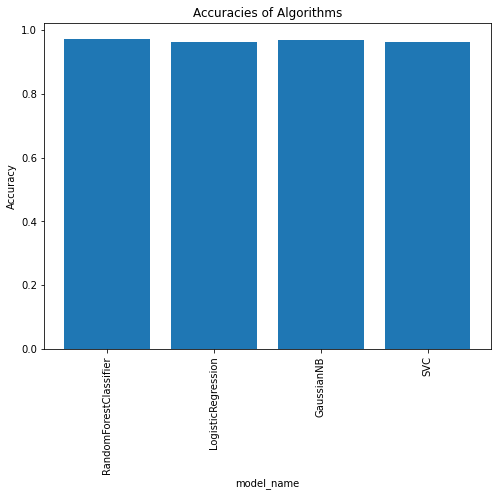

In [19]:
plt.figure(figsize= (8,6))
plt.bar(cv_df['model_name'], cv_df['Accuracy'])
plt.xlabel('model_name')
plt.ylabel('Accuracy')
plt.xticks(rotation = 'vertical')
plt.title("Accuracies of Algorithms")
plt.show()